### Referênce

By Jason Brownlee on February 10, 2019 in [Python Machine Learning](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) 


# Machine Learning in Python: Step-By-Step Tutorial

In [59]:
# Biblioteca para manipulação dos dados
import numpy as np
import pandas as pd

# Biblioteca para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Técnicas de avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Técnicas de divisão dos dados
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Algoritmos de Machine Learning
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## 1. Load Data

In [7]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Shape Data

In [8]:
dataset.shape

(150, 5)

##### Description Data

In [9]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Class Distribution

In [34]:
dataset['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

## 2. Data Visualization

Será usado alguns gráficos para extrair _insights_ sobre o problema proposto.

##### Boxplot

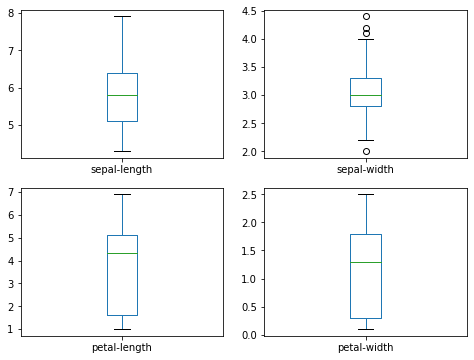

In [20]:
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8,6))
plt.show();

##### Histogram

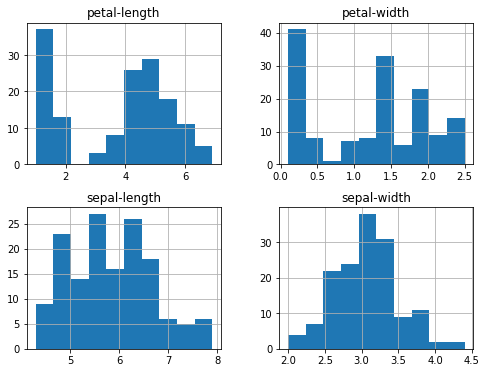

In [21]:
dataset.hist(figsize=(8,6))
plt.show();

##### Multivariate Plots

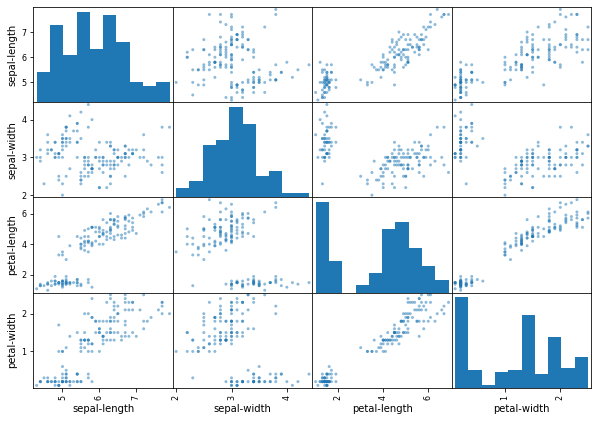

In [28]:
scatter_matrix(dataset, figsize=(10, 7))
plt.show();

## 3. Evaluate Some Algorithms

Nesta seção os dados serão separados e submetidos aos algoritmos para serem treinados e validados.

##### Create a Validation Dataset

In [50]:
X = dataset.values[:,0:4].copy()
y = dataset.values[:,4].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

##### Test Harness and Build Models

In [49]:
models = []

models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))

names = []
results = []

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.9495959595959598 (0.06507191127809249)
LDA: 0.9797979797979799 (0.040655781409087106)
KNN: 0.9425252525252527 (0.06236905474591538)
CART: 0.9421717171717173 (0.06905030483270912)
NB: 0.9182828282828284 (0.06487719242483359)
SVM: 0.9595959595959597 (0.04989530923324636)


## 4. Select Best Model

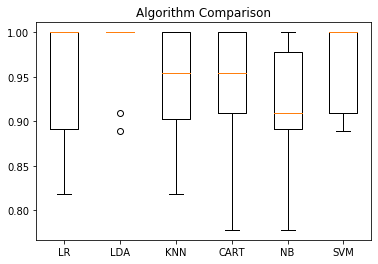

In [43]:
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

## 5. Make Predictions

In [51]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

##### Accuracy Score

In [52]:
accuracy_score(y_val, y_pred)

0.98

##### Confusion Matrix 

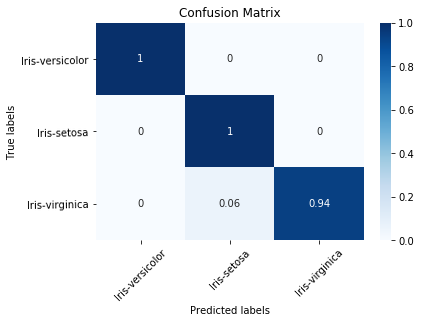

In [128]:
cm = confusion_matrix(y_val, y_pred)
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums

labels = dataset['class'].value_counts().keys()

ax= plt.subplot()

sns.heatmap(norm_conf_mx.round(2),
            annot=True, 
            cmap='Blues',
            ax=ax)
ax.set_ylim([3,0])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels, rotation=45)
ax.yaxis.set_ticklabels(labels, rotation=1);